Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\user\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show transformers

Name: transformers
Version: 4.46.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: c:\users\user\anaconda3\lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: groundingdino
Note: you may need to restart the kernel to use updated packages.


In [ ]:
cd D:/bib_assign

D:\bib_assign


In [5]:
cd bib_assign/

D:\bib_assign


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Let's load the train and test data.

In [2]:
df_t = pd.read_excel('X_test.xlsx')
df_r = pd.read_excel('XY_train.xlsx')

In [180]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Shares                              429 non-null    int64  
 1   Comments added                      429 non-null    int64  
 2   Likes (vs. dislikes) (%)            429 non-null    float64
 3   Average view duration               429 non-null    object 
 4   Views                               429 non-null    int64  
 5   Subscribers                         429 non-null    int64  
 6   Impressions click-through rate (%)  429 non-null    float64
 7   Average_views_min                   429 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 26.9+ KB


In [179]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Shares                              71 non-null     int64  
 1   Comments added                      71 non-null     int64  
 2   Likes (vs. dislikes) (%)            71 non-null     float64
 3   Average view duration               71 non-null     object 
 4   Subscribers                         71 non-null     int64  
 5   Impressions click-through rate (%)  71 non-null     float64
 6   Views prediction                    0 non-null      float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


Since, the average view duration is in date time format we need to convert it in some numeric format, I have decided to convert the time to minutes.

In [5]:
def time_to_mins(tmstr):
    time_min = tmstr.hour*60+tmstr.minute+(tmstr.second/60)
    return time_min

In [6]:
df_r['Average_views_min'] = df_r['Average view duration'].apply(time_to_mins)

In [181]:
df_t['Average_views_min'] = df_t['Average view duration'].apply(time_to_mins)

In [7]:
df_r.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Views,Subscribers,Impressions click-through rate (%),Average_views_min
0,2035,1578,97.95,00:09:32,4319500,3574,4.66,9.533333
1,1070,1878,97.92,00:10:38,2522030,4845,5.14,10.633333
2,1375,4314,97.54,00:09:31,3564849,8505,7.00,9.516667
3,420,502,98.34,00:06:06,1148850,513,7.27,6.100000
4,982,977,97.43,00:07:32,1559413,3865,5.08,7.533333


We will now check if their are any null values in our dataset.

In [8]:
df_r.isnull().sum()

Shares                                0
Comments added                        0
Likes (vs. dislikes) (%)              0
Average view duration                 0
Views                                 0
Subscribers                           0
Impressions click-through rate (%)    0
Average_views_min                     0
dtype: int64

We can drop the average view duration column now since, we don't need it any more.

In [ ]:
df_ur = df_r.drop(['Average view duration'],axis=1)
df_ut = df_t.drop(['Average view duration','Views prediction'],axis=1)

In [12]:
corr_matrix = df_ur.corr()

We will visualize the correlation matrix to aid us in feature selection using features with higher correlation with our target but not with other input features.

<AxesSubplot:title={'center':'Correlation_heatmap'}>

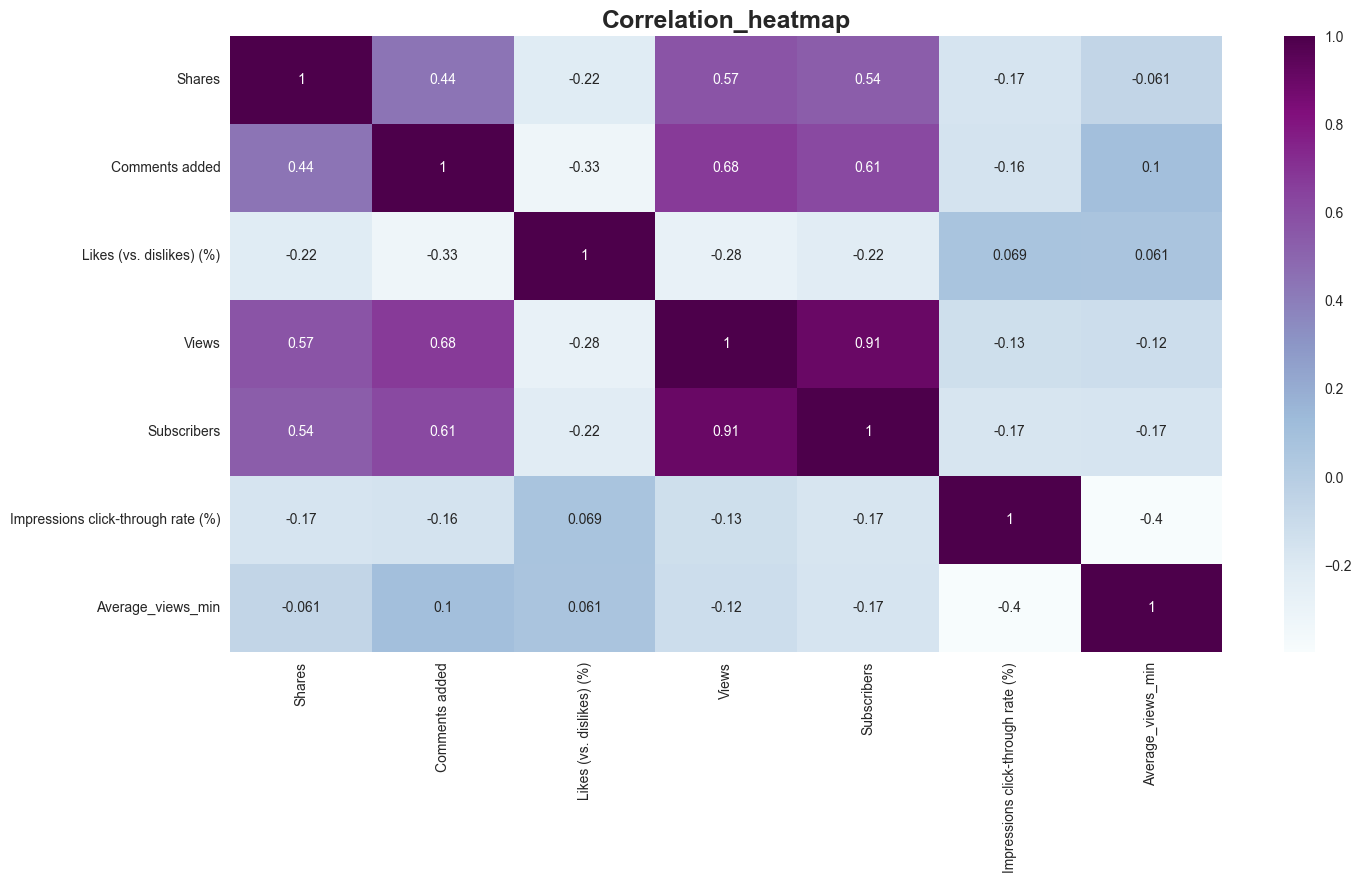

In [13]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16,8)
title = 'Correlation_heatmap'
plt.title(title, fontsize=18, weight='bold')
sns.heatmap(corr_matrix,cmap='BuPu', annot=True)

Visualising the relation of features with the target will help us with model selection and notice patterns that can be used for feature engineering.

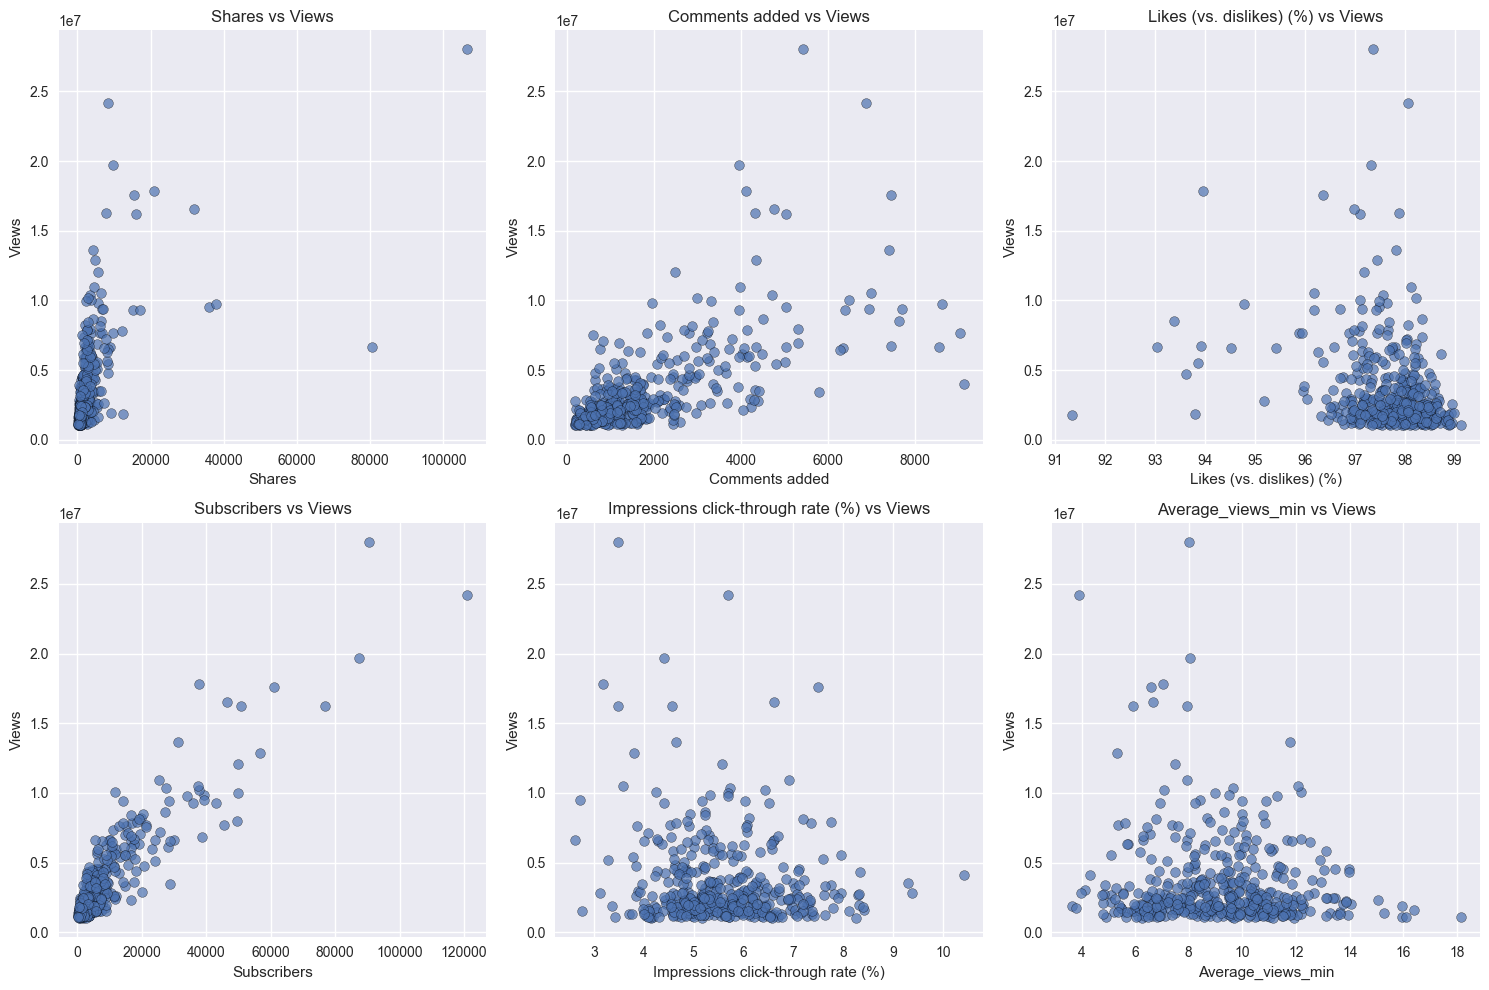

In [24]:
target_col = 'Views'

# Input columns (all except the target column)
input_cols = [col for col in df_ur.columns if col != target_col]

# Number of input columns
num_features = len(input_cols)

# Determine grid size (e.g., 2x3 for 6 features, 3x3 for 9 features, etc.)
grid_rows = (num_features // 3) + num_features % 3
grid_cols = min(num_features, 3)

# Create subplots
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 5 * grid_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each feature against the target column
for i, feature in enumerate(input_cols):
    axes[i].scatter(df_ur[feature], df_ur[target_col], alpha=0.7, edgecolor='k')
    axes[i].set_title(f"{feature} vs {target_col}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_col)

# Hide any unused subplots
for j in range(len(input_cols), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

The relavant features have a linear relationship with the target but the average views duration and impressions click-through rate don't show little if any variance for our target feature. They won't prove to be very useful for the task. From the visuals we can determine that our task is linear and so, linear regression may prove to be a very effective choice. Finally the data is very skewed to the left with respect to our views, there is more data for lower than mean value of views and much much lesser data for higher views. 

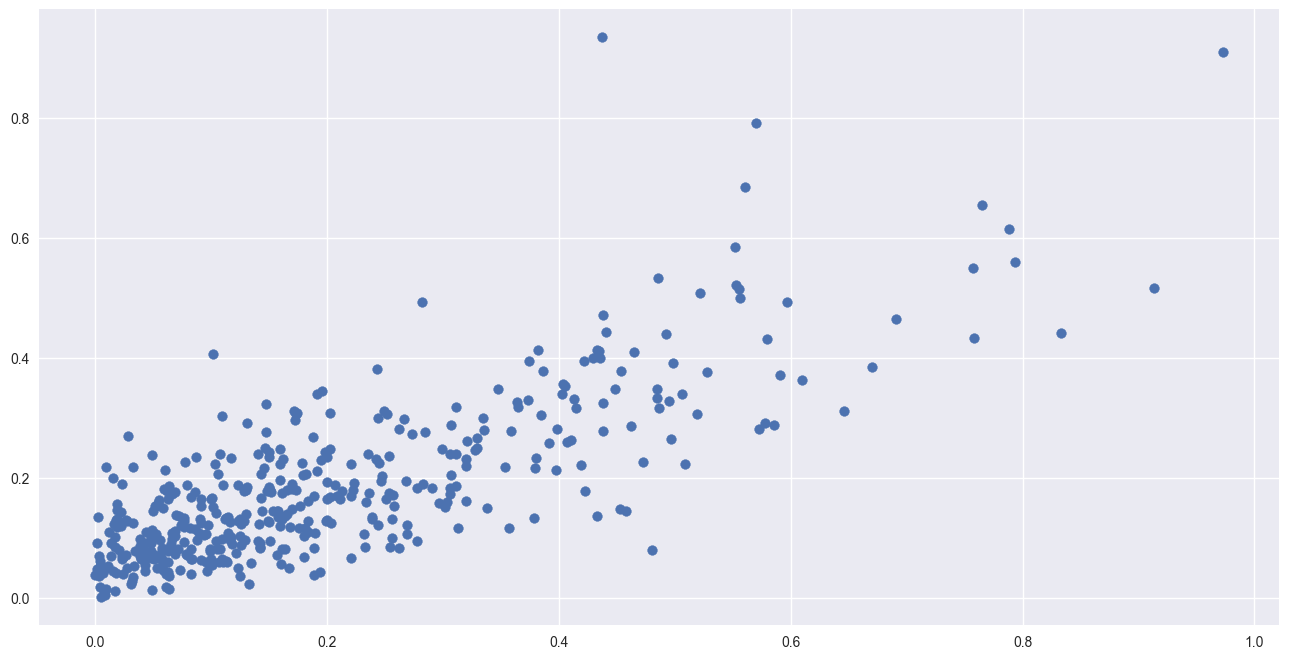

In [178]:
scatx=df_logscr['Views']
scaty=(df_logscr['Shares']+df_logscr['Comments added'])/2
plt.scatter(scatx, scaty)
plt.show()

Now that we have analysed the data we will perform scaling and log transform to address the skewness in data.

In [188]:
from sklearn.preprocessing import StandardScaler
#Standardising to scale data although it is skewed 
scaler = StandardScaler()
df_scr = pd.DataFrame(scaler.fit_transform(df_ur),columns=df_ur.columns)

#adding magnitude of min with 1 will make sure the values are over 0, we chose this because it gave the best results
df_adju = df_scr+df_scr.min()*-1+ 1

#log of dataframe
df_logscr = np.log10(df_adju)

#adding these two columns because anyone with both attributes high should have higher views and average of their graphs comes out more linear
df_logscr['Shares & Comments'] = (df_logscr['Shares'] + df_logscr['Comments added'])/2

logcorr = df_logscr.corr()

In [189]:
#Standardising to scale data although it is skewed 
scaler = StandardScaler()
df_sct = pd.DataFrame(scaler.fit_transform(df_ut),columns=df_ut.columns)

#adding magnitude of min with 1 will make sure the values are over 0, we chose this because it gave the best results
df_adju = df_sct+df_sct.min()*-1+ 1

#log of dataframe
df_logsct = np.log10(df_adju)

#adding these two columns because anyone with both attributes high should have higher views and average of their graphs comes out more linear
df_logsct['Shares & Comments'] = (df_logsct['Shares'] + df_logsct['Comments added'])/2

Now lets visualize the correlationship graph to see how the log scaling has effected the relationships

<AxesSubplot:title={'center':'Correlation_heatmap'}>

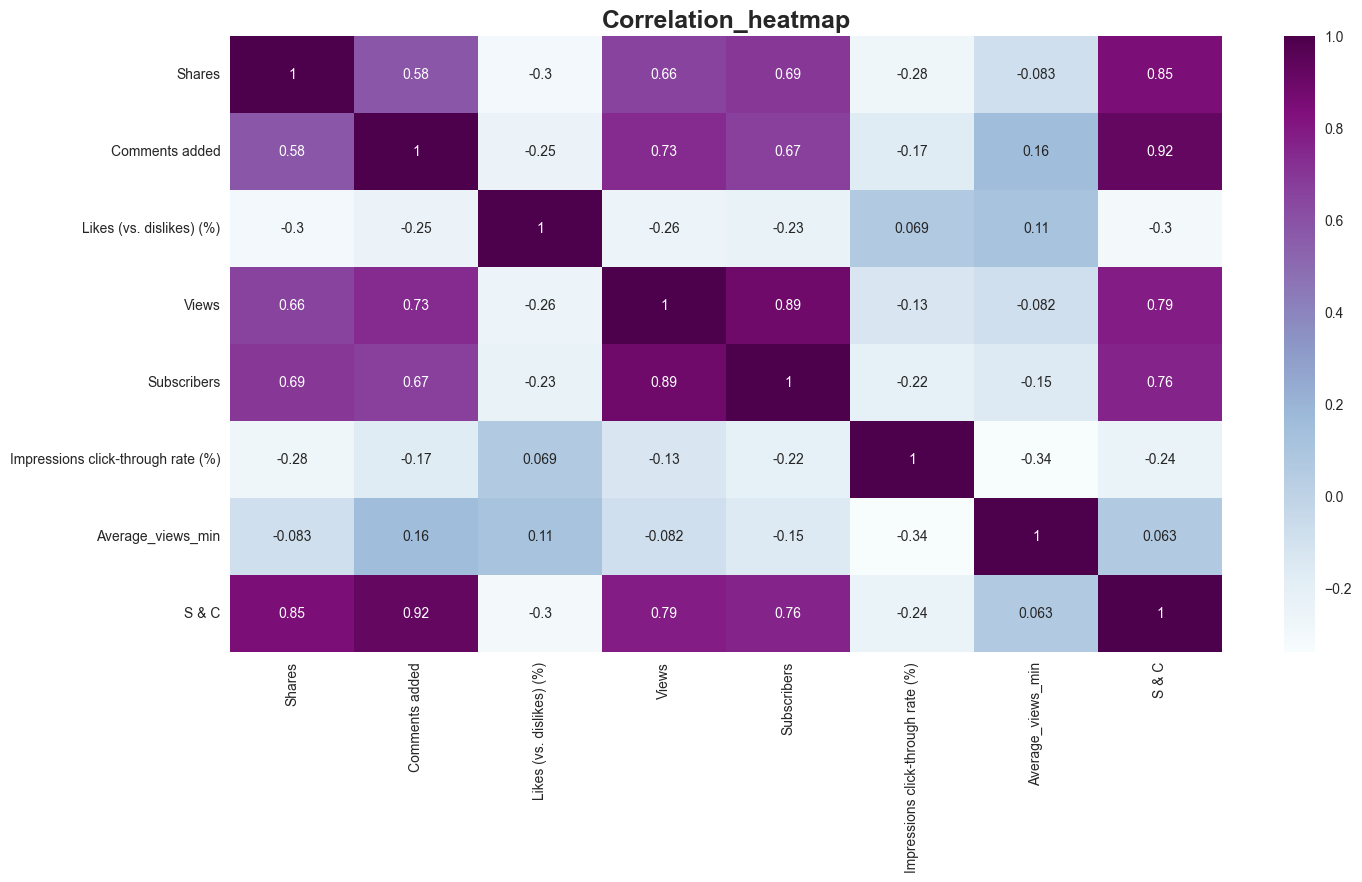

In [149]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16,8)
title = 'Correlation_heatmap'
plt.title(title, fontsize=18, weight='bold')
sns.heatmap(logcorr,cmap='BuPu', annot=True)

Let's also, visualize our test data it will give us an idea of it's relationships in comparison to our training data.

<AxesSubplot:title={'center':'Correlation_heatmap'}>

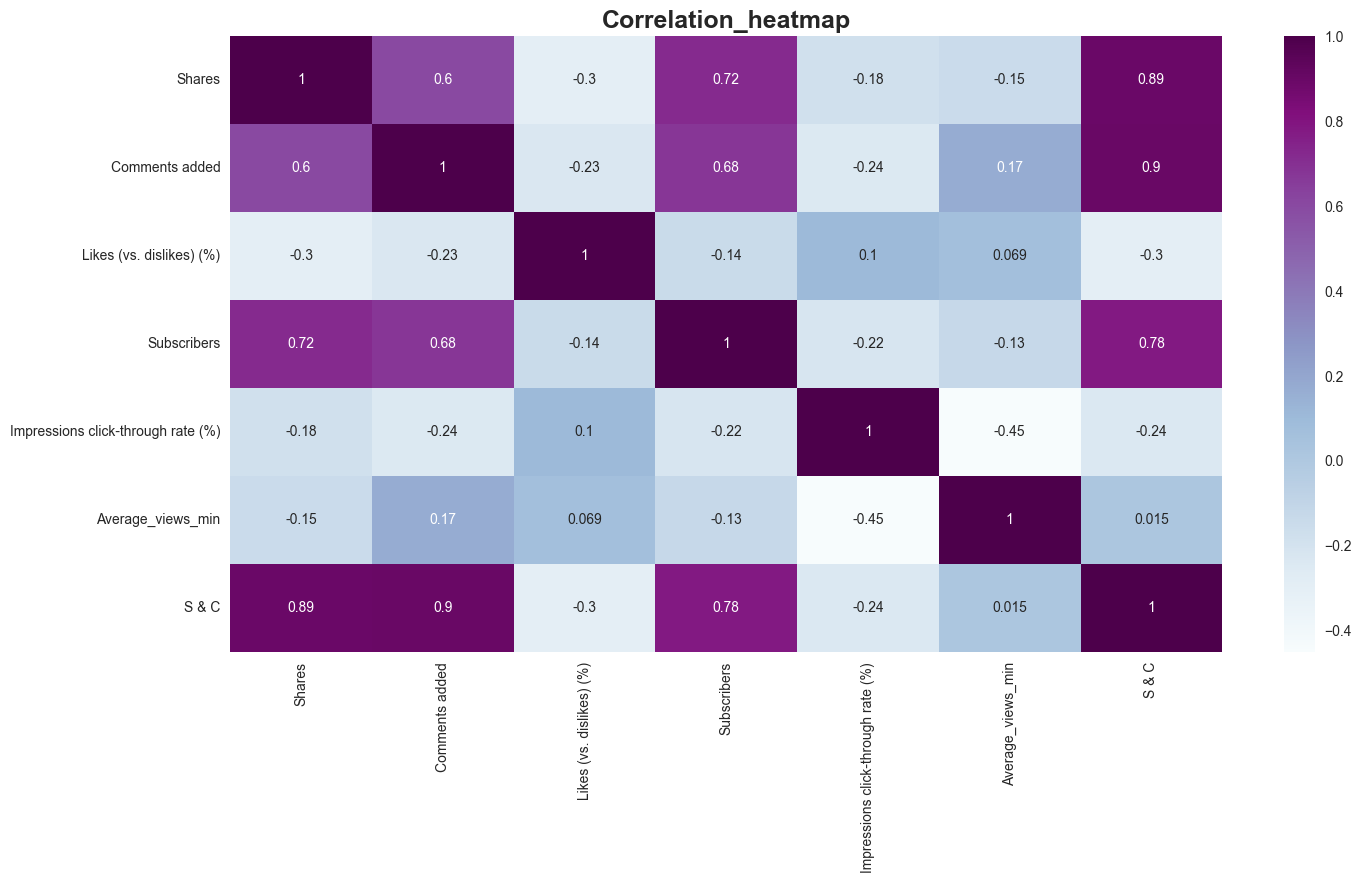

In [186]:
logcorr = df_logsct.corr()
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16,8)
title = 'Correlation_heatmap'
plt.title(title, fontsize=18, weight='bold')
sns.heatmap(logcorr,cmap='BuPu', annot=True)

Quite, similar to the training data, we can assume that our model will be relevant for the test data as well.

The log transform should make our data look like it was squashed closer and zoomed in which is how it would have looked if the data was more normally distributed.

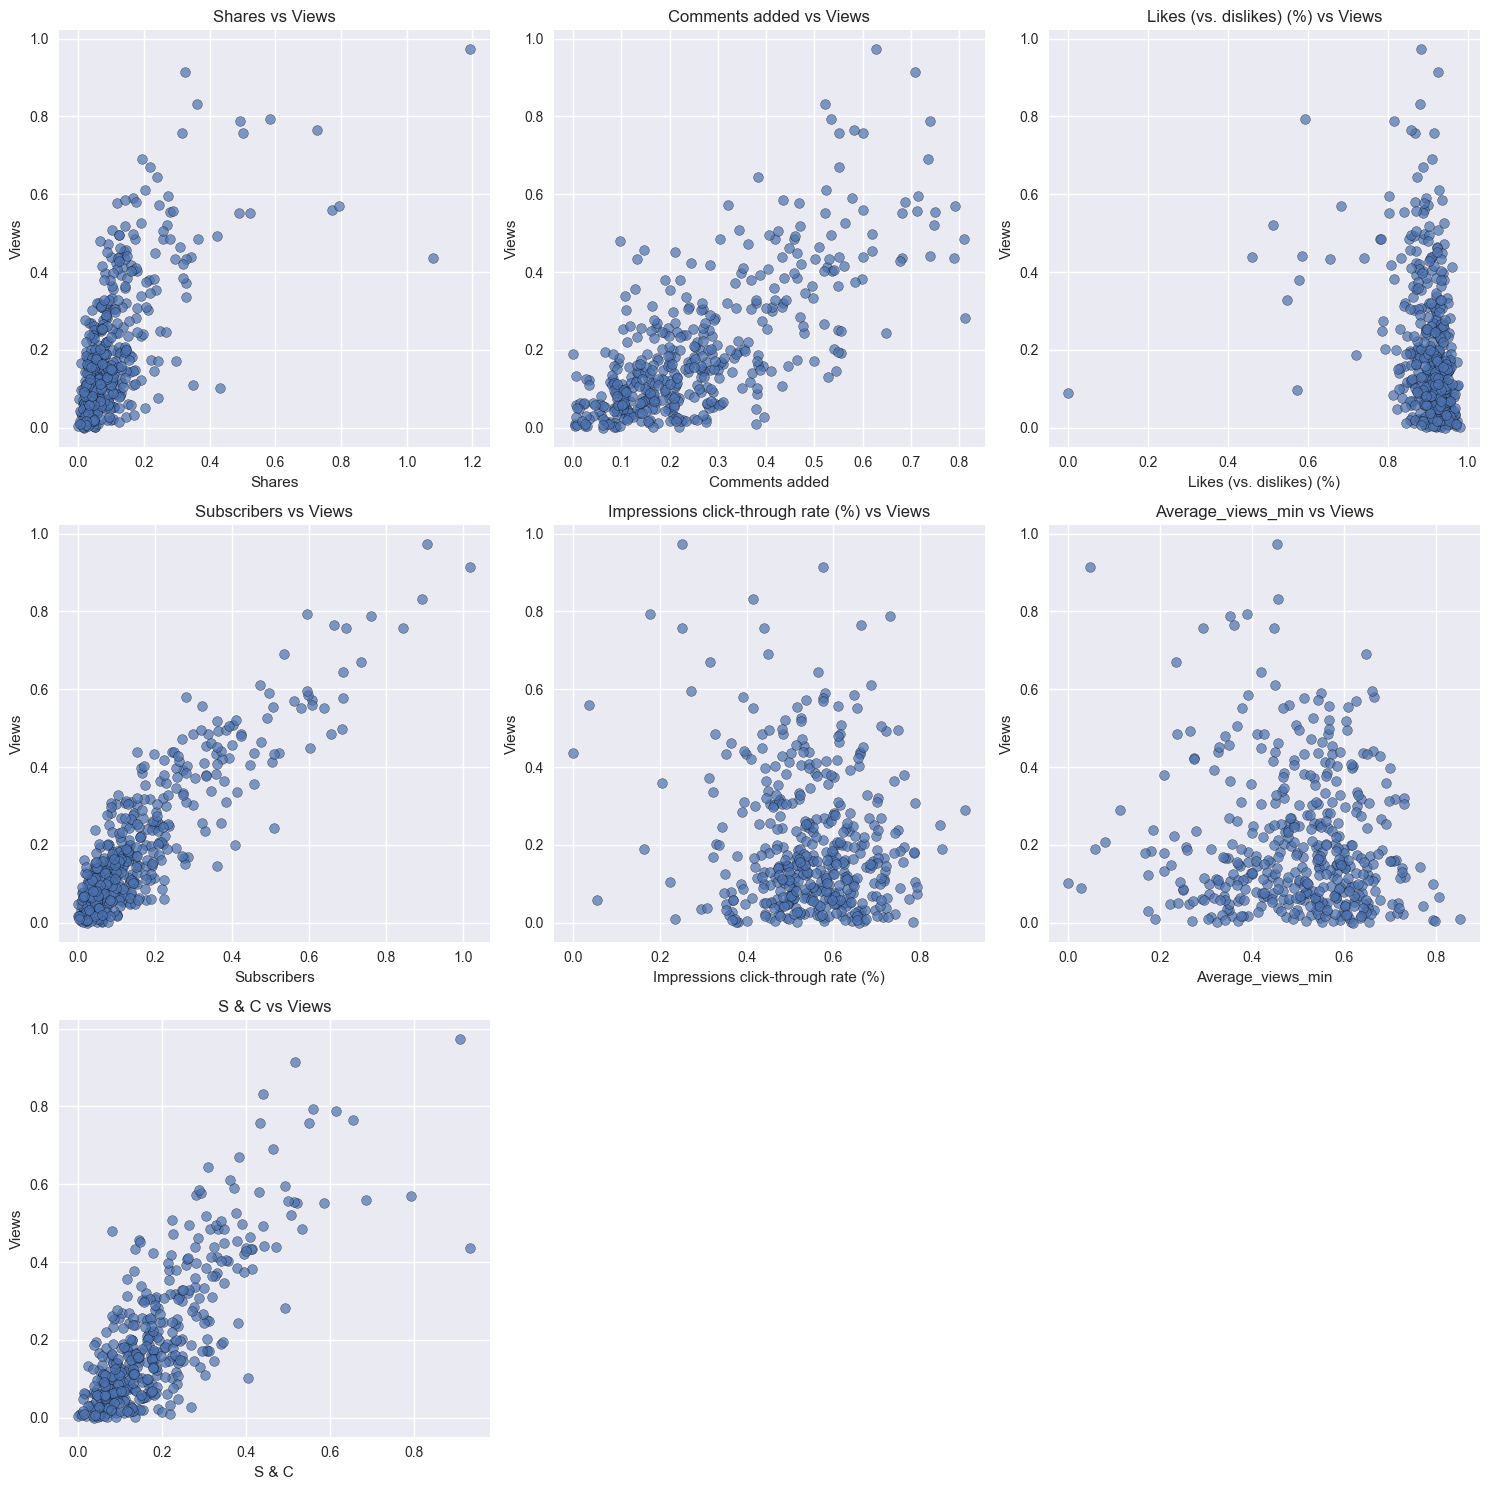

In [150]:
target_col = 'Views'

# Input columns (all except the target column)
input_cols = [col for col in df_logscr.columns if col != target_col]

# Number of input columns
num_features = len(input_cols)

# Determine grid size (e.g., 2x3 for 6 features, 3x3 for 9 features, etc.)
grid_rows = (num_features // 3) + num_features % 3
grid_cols = min(num_features, 3)

# Create subplots
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 5 * grid_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each feature against the target column
for i, feature in enumerate(input_cols):
    axes[i].scatter(df_logscr[feature], df_logscr[target_col], alpha=0.7, edgecolor='k')
    axes[i].set_title(f"{feature} vs {target_col}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_col)

# Hide any unused subplots
for j in range(len(input_cols), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

Now that we analysed and transformed our features let's get to modelling. We will try 3 different models linear regression, random forest, XGBoost. We will also, compare the effects of our transform. Finally, we will select the important features based on a anova test will perform, we also, want to compare the effect of including these features compared to excluding them.

In [190]:
from sklearn.feature_selection import SelectKBest, f_regression

#We will drop the target for inputs and any field we want to exclude.
sel_x = df_logscr.drop(['Views'],axis=1)
#We will select only the target 'Views' for labels.
sel_y = df_logscr['Views']
#We will perform anova for k best clusters, all here, to give an importance score to features.
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(sel_x, sel_y)
feature_scores = pd.DataFrame({'Feature': sel_x.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))

                              Feature        Score
3                         Subscribers  1544.167498
6                   Shares & Comments   697.724495
1                      Comments added   498.776722
0                              Shares   328.436857
2            Likes (vs. dislikes) (%)    29.771626
4  Impressions click-through rate (%)     7.605606
5                   Average_views_min     2.915169


Import all the libraries for the models we will use and the metrics.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

From above we can tell that Average_views_min, Impressions click-through rate (%) are not significant hence, we will drop them. However, we will also drop Comments added and Shares because they are redundant now that we have 'Shares & Comments' column.

We will split the data into train and validation dataset in the ration of 90 and 10 respectively.

In [201]:
#We will drop the target for inputs and any field we want to exclude.
sel_x = df_logscr.drop(['Views','Average_views_min','Impressions click-through rate (%)','Comments added','Shares'],axis=1)
#We will select only the target 'Views' for labels.
sel_y = df_logscr['Views']
#Split with 10 % allocated to validation.
yt_t, yt_te, yt_ty, yt_tey = train_test_split(
    sel_x, sel_y, test_size=0.1, random_state=42)

In [ ]:

#Initiate a random forest model with 100 estimators
model = RandomForestRegressor(n_estimators=100, random_state=42)
#Train the model
model.fit(yt_t, yt_ty)
#Predict values
preds = model.predict(yt_te)
#Since, our predictions are scaled too, we will transform them back to their orignial scale.
#Reverse the log transform
full_ry = 10 ** preds
#Reverse the standardisation by multiplying with Standard deviation and then adding back the mean.
full_ry = full_ry * df_ur['Views'].std()
full_ry = full_ry + df_ur['Views'].mean()
#Similarly for the target values of validation dataset.
full_tey = 10 ** yt_tey
full_tey = full_tey * df_ur['Views'].std()
full_tey = full_tey + df_ur['Views'].mean()
#Now lets calculate the percentage error which will be more relavant for our large targets.
mean_absolute_percentage_error(full_tey, full_ry)

0.0939008726869319

In [202]:
#Initiate a Linear Regression model and train it.
reg = LinearRegression().fit(yt_t, yt_ty)
#Predict values
preds = reg.predict(yt_te)
#Since, our predictions are scaled too, we will transform them back to their orignial scale.
#Reverse the log transform
full_ry = 10 ** preds
#Reverse the standardisation by multiplying with Standard deviation and then adding back the mean.
full_ry = full_ry * df_ur['Views'].std()
full_ry = full_ry + df_ur['Views'].mean()
#Similarly for the target values of validation dataset.
full_tey = 10 ** yt_tey
full_tey = full_tey * df_ur['Views'].std()
full_tey = full_tey + df_ur['Views'].mean()
#Now lets calculate the percentage error which will be more relavant for our large targets.
mean_absolute_percentage_error(full_tey, full_ry)

0.0815061237602834

In [ ]:
#We will experiment with XGBoost now.
#First we will intiate a model
regressor=xgb.XGBRegressor(eval_metric='rmsle',objective='reg:squarederror')
param_grid = {"max_depth":    [2, 4, 6],
              "n_estimators": [100, 300, 500],
              "learning_rate": [0.01, 0.007]
              }
#Gridsearch for hyperparameter tuning 
search = GridSearchCV(regressor, param_grid, cv=5).fit(yt_t, yt_ty)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}


In [ ]:
#Initiate the model with best parameters
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle',
                           objective='reg:squarederror')
#Train the model
regressor.fit(yt_t,yt_ty)
#Predict values
preds = regressor.predict(yt_te)
#Since, our predictions are scaled too, we will transform them back to their orignial scale.
#Reverse the log transform
full_ry = 10 ** preds
#Reverse the standardisation by multiplying with Standard deviation and then adding back the mean.
full_ry = full_ry * df_ur['Views'].std()
full_ry = full_ry + df_ur['Views'].mean()
#Similarly for the target values of validation dataset.
full_tey = 10 ** yt_tey
full_tey = full_tey * df_ur['Views'].std()
full_tey = full_tey + df_ur['Views'].mean()
#Now lets calculate the percentage error which will be more relavant for our large targets.
mean_absolute_percentage_error(full_tey, full_ry)

0.08675469640601871

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(yt_t.columns, regressor.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost")
plt.show()

In [ ]:
or_x = df_ur.drop(['Views','Average_views_min','Impressions click-through rate (%)'],axis=1)
or_y = df_ur['Views']
otx, ote, oty, otey = train_test_split(or_x, or_y, test_size=0.1, random_state=42)

In [ ]:
reg = LinearRegression().fit(otx, oty)
preds = reg.predict(ote)
mean_absolute_percentage_error(otey, preds)

0.22670407199353254

In [199]:
sel_x = df_logscr.drop(['Views'],axis=1)
#We will select only the target 'Views' for labels.
sel_y = df_logscr['Views']
#Split with 10 % allocated to validation.
yt_t, yt_te, yt_ty, yt_tey = train_test_split(
    sel_x, sel_y, test_size=0.1, random_state=42)

In [200]:
#Initiate a Linear Regression model and train it.
reg = LinearRegression().fit(yt_t, yt_ty)
#Predict values
preds = reg.predict(yt_te)
#Since, our predictions are scaled too, we will transform them back to their orignial scale.
#Reverse the log transform
full_ry = 10 ** preds
#Reverse the standardisation by multiplying with Standard deviation and then adding back the mean.
full_ry = full_ry * df_ur['Views'].std()
full_ry = full_ry + df_ur['Views'].mean()
#Similarly for the target values of validation dataset.
full_tey = 10 ** yt_tey
full_tey = full_tey * df_ur['Views'].std()
full_tey = full_tey + df_ur['Views'].mean()
#Now lets calculate the percentage error which will be more relavant for our large targets.
mean_absolute_percentage_error(full_tey, full_ry)

0.08298235880438487

In [204]:
#We will drop the target for inputs and any field we want to exclude.
sel_x = df_logsct.drop(['Average_views_min','Impressions click-through rate (%)','Comments added','Shares'],axis=1)
#We will predict for test.
preds = reg.predict(sel_x)
#Since, our predictions are scaled too, we will transform them back to their orignial scale.
#Reverse the log transform
full_ry = 10 ** preds
#Reverse the standardisation by multiplying with Standard deviation and then adding back the mean.
full_ry = full_ry * df_ur['Views'].std()
full_ry = full_ry + df_ur['Views'].mean()

In [207]:
full_ry.shape

(71,)

In [ ]:
import openpyxl

#Load the Excel workbook
wkbk = openpyxl.load_workbook('X_test.xlsx')
#Select the active sheet
sheet = wkbk.active  
#the column where we paste
column_letter = "G"
strow = 2

#Paste values into the column
for i, value in enumerate(full_ry, start=strow):
    cell = f"{column_letter}{i}"
    sheet[cell] = value

#Save the workbook
wkbk.save('X_test.xlsx')

NameError: name 'file_path' is not defined